Був взатий датасет "Iris Species"
link:"https://www.kaggle.com/datasets/uciml/iris?resource=download"

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# 1. Завантаження даних


df = pd.read_csv('Iris.csv')  # твій датасет
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# 2. Первинний аналіз даних


print("Розміри датасету:", df.shape)
print("\nТипи змінних:\n", df.dtypes)
print("\nОписова статистика:\n", df.describe())
print("\nПеревірка пропусків:\n", df.isnull().sum())

Розміри датасету: (150, 6)

Типи змінних:
 Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

Описова статистика:
                Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

Перевірка пропусків:
 Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLe

In [ ]:
# 3. Формування X та y


# Бінарна класифікація через медіану
y = (df['PetalLengthCm'] > df['PetalLengthCm'].median()).astype(int)

# Незалежні змінні
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalWidthCm']]

print("Форма X:", X.shape)
print("Форма y:", y.shape)

Форма X: (150, 3)
Форма y: (150,)


In [ ]:
# 4. Розбиття на train/test


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (120, 3)
Test shape: (30, 3)


In [ ]:
# 5. Масштабування даних


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Масштабування виконано")

Масштабування виконано


In [ ]:
# 6. Створення та навчання моделі Logistic Regression


model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Передбачення
y_pred = model.predict(X_test_scaled)

In [ ]:
# 7. Оцінка моделі


acc = accuracy_score(y_test, y_pred)
print("Точність моделі:", acc)

print("\nКласифікаційний звіт:\n", classification_report(y_test, y_pred))

Точність моделі: 0.9333333333333333

Класифікаційний звіт:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93        13
           1       1.00      0.88      0.94        17

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.94      0.93      0.93        30



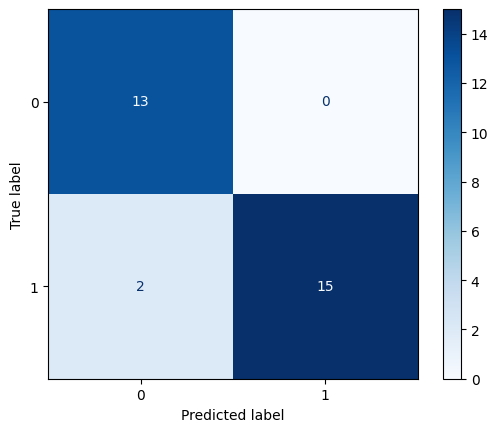

In [ ]:
# 8. Матриця плутанини


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

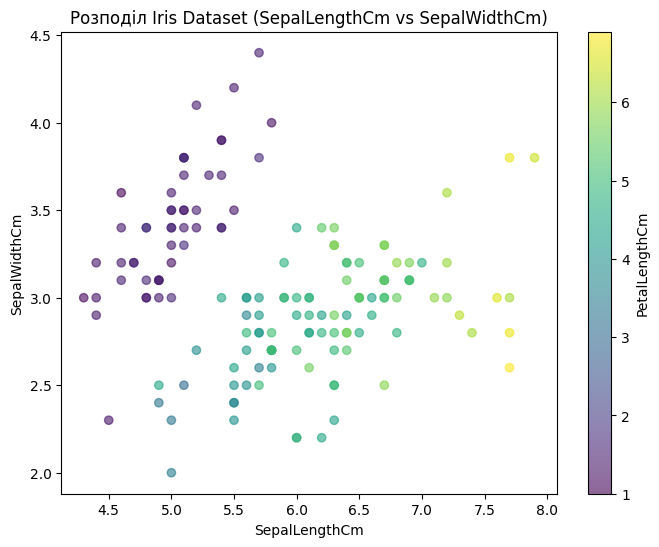

In [ ]:
# 9. Візуалізація даних


plt.figure(figsize=(8,6))
plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'], c=df['PetalLengthCm'], cmap='viridis', alpha=0.6)
plt.title("Розподіл Iris Dataset (SepalLengthCm vs SepalWidthCm)")
plt.xlabel("SepalLengthCm")
plt.ylabel("SepalWidthCm")
plt.colorbar(label="PetalLengthCm")
plt.show()